## importacion de librerias necesarias
 
 

In [1]:
# Importación de librerías necesarias para el procesamiento de imágenes y visualización de resultados
import cv2  # OpenCV para manejo de imágenes
import numpy as np  # Numpy para operaciones numéricas y matriciales
import matplotlib.pyplot as plt  # Matplotlib para visualización de imágenes y gráficos

In [2]:
# Definición del directorio base donde se encuentran las imágenes a utilizar
base_path = "../Images/"  # Ajustar la ruta según la ubicación real de las imágenes

## 2. Implementar y comparar diferentes transformaciones de intensidad a nivel de píxel.
Con un teléfono celular tomen dos fotografías de la fachada (puede ser de la casa de algún integrante del equipo) a las 6 am y a las 7 pm. Las fotografías deben ser desde el mismo punto. Sobre las fotografías ilustren las siguientes operaciones (implementadas a mano):
* Ajuste de brillo
* Ajuste de contraste
* Corrección gama
* Sumen (A+B), resten(A-B), multipliquen (A*B) y dividan (A/B) ambas fotografías.

In [ ]:
# Cargar las imágenes de la fachada tomadas de día y de noche
fachadaDia = cv2.imread(base_path + "fachada_dia.jpeg")  # Imagen tomada de día
fachadaNoche = cv2.imread(base_path + "fachada_noche.jpeg")  # Imagen tomada de noche

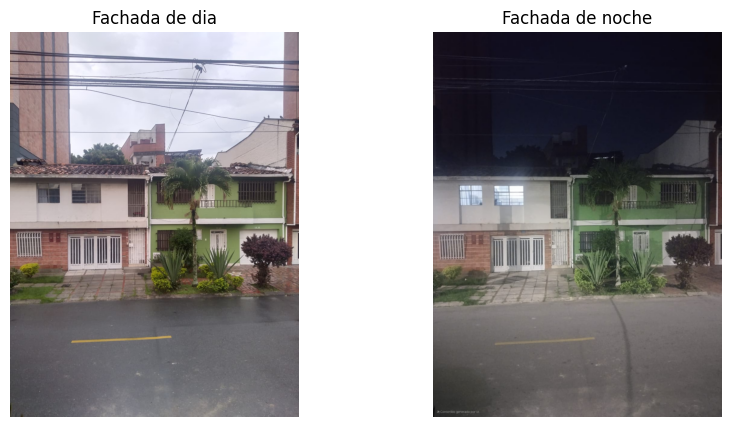

In [ ]:
# Función para mostrar dos imágenes en color lado a lado con sus respectivos títulos
def mostrar_imagenes_color(imagen1, imagen2, titulo1, titulo2):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(imagen1, cv2.COLOR_BGR2RGB))  # Conversión de BGR a RGB para visualización correcta
    plt.title(titulo1)
    plt.axis("off")
    plt.subplot(1,2,2)
    plt.imshow(cv2.cvtColor(imagen2, cv2.COLOR_BGR2RGB))
    plt.title(titulo2)
    plt.axis("off")
    plt.show()

# Función para mostrar dos imágenes en escala de grises lado a lado con sus títulos
def mostrar_imagenes_grises(imagen1, imagen2, titulo1, titulo2):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(imagen1, cmap='gray')
    plt.title(titulo1)
    plt.axis("off")
    plt.subplot(1,2,2)
    plt.imshow(imagen2, cmap='gray')
    plt.title(titulo2)
    plt.axis("off")
    plt.show()

# Visualización de las imágenes originales en color
mostrar_imagenes_color(fachadaDia, fachadaNoche, "Fachada de dia", "Fachada de noche")

### Escala de grises
Conviertan ambas imágenes a escala de grises utilizando la fórmula de luminosidad: Y = 0.21 R + 0.72 G + 0.07 B

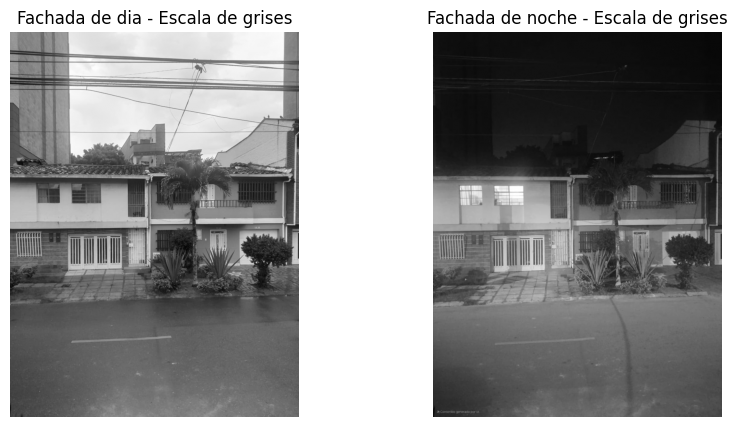

In [ ]:
# Transformación a escala de grises usando la fórmula de luminosidad: Y = 0.21 R + 0.72 G + 0.07 B
# Se aplica la fórmula a cada imagen para obtener la versión en grises
fachada_dia_grises = np.dot(fachadaDia[...,:3], [0.21, 0.72, 0.07])  # Imagen de día en grises
fachada_noche_grises = np.dot(fachadaNoche[...,:3], [0.21, 0.72, 0.07])  # Imagen de noche en grises
# Mostrar las imágenes resultantes en escala de grises
mostrar_imagenes_grises(fachada_dia_grises, fachada_noche_grises, "Fachada de dia - Escala de grises", "Fachada de noche - Escala de grises")

In [ ]:
# Función para saturar los valores de una imagen:
# Si el valor del píxel es mayor a 255 se asigna 255, si es menor a 0 se asigna 0.
def saturar_imagen(imagen):
    imagen_saturada = np.where(imagen > 255, 255, imagen)
    imagen_saturada = np.where(imagen_saturada < 0, 0, imagen_saturada)
    return imagen_saturada.astype('uint8')

#### Ajuste de brillo

In [ ]:
# Función para ajustar el brillo de una imagen en escala de grises
def ajustar_brillo_imagen(imagen, valor_brillo):
    # Convertir la imagen a tipo int16 para evitar overflow/underflow
    imagen_int = imagen.astype('int16')
    
    # Ajustar el brillo sumando el valor especificado a cada píxel
    imagen_ajustada = imagen_int + valor_brillo
    
    # Asegurar que los valores estén en el rango [0, 255]
    imagen_ajustada = saturar_imagen(imagen_ajustada)
    
    # Convertir de nuevo a uint8 (saturar_imagen ya devuelve uint8)
    return imagen_ajustada

Imagenes originales en escala de grises


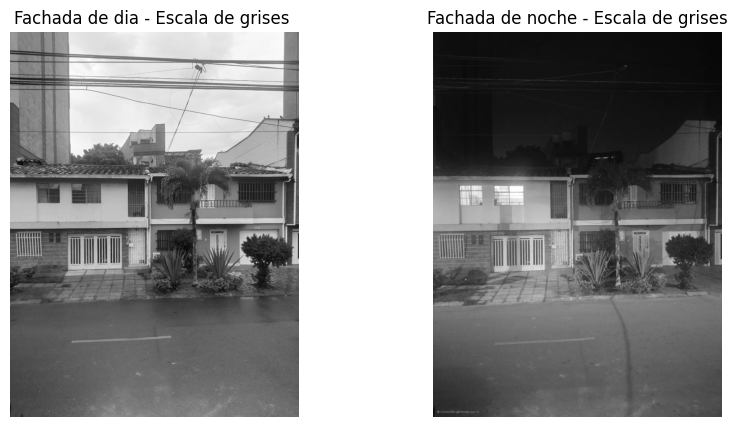

Imagenes con con brillo ajustado


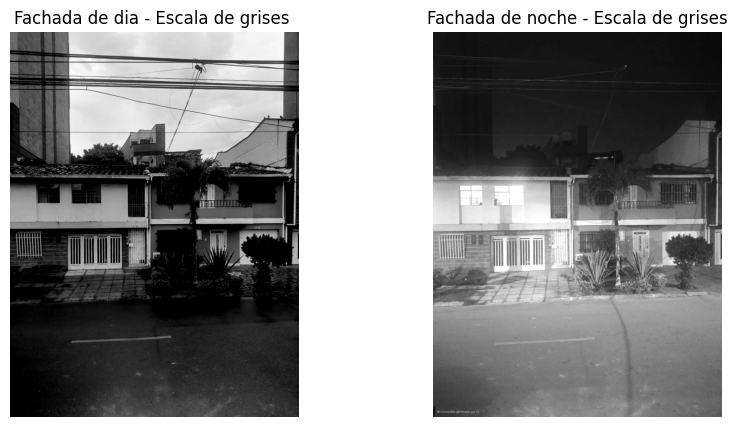

medias de las imagenes originales
Media fachada dia original: 133.03938770345042
Media fachada noche original: 76.43237952473959
medias de las imagenes con brillo ajustado
Media fachada dia brillo ajustado: 55.91535807291667
Media fachada noche brillo ajustado: 135.69476399739582


In [ ]:
# Aplicación del ajuste de brillo a las imágenes en escala de grises
# Se disminuye el brillo de la imagen de día y se aumenta el de la imagen de noche
fachada_dia_grises_brillo_ajustado = ajustar_brillo_imagen(fachada_dia_grises, -80)  # Día: brillo reducido
fachada_noche_grises_brillo_ajustado = ajustar_brillo_imagen(fachada_noche_grises, 60)  # Noche: brillo aumentado
# Mostrar imágenes originales y con brillo ajustado
print("Imagenes originales en escala de grises")
mostrar_imagenes_grises(fachada_dia_grises, fachada_noche_grises, "Fachada de dia - Escala de grises ", "Fachada de noche - Escala de grises")
print("Imagenes con con brillo ajustado")
mostrar_imagenes_grises(fachada_dia_grises_brillo_ajustado, fachada_noche_grises_brillo_ajustado, "Fachada de dia - Escala de grises ", "Fachada de noche - Escala de grises")

# Cálculo y visualización de las medias de las imágenes antes y después del ajuste de brillo
print("medias de las imagenes originales")
print("Media fachada dia original:", np.mean(fachada_dia_grises))
print("Media fachada noche original:", np.mean(fachada_noche_grises))

print("medias de las imagenes con brillo ajustado")
print("Media fachada dia brillo ajustado:", np.mean(fachada_dia_grises_brillo_ajustado))
print("Media fachada noche brillo ajustado:", np.mean(fachada_noche_grises_brillo_ajustado))

#### Ajuste de contraste

In [ ]:
# Función para ajustar el contraste de una imagen en escala de grises
def ajustar_contraste_imagen(imagen, factor_contraste):
    # Convertir la imagen a tipo float para evitar overflow/underflow
    imagen_float = imagen.astype('float32')
    
    # Ajustar el contraste: se centra en 128 y se multiplica por el factor
    imagen_ajustada = (imagen_float - 128) * factor_contraste + 128
    
    # Asegurar que los valores estén en el rango [0, 255]
    imagen_ajustada = saturar_imagen(imagen_ajustada)
    
    # Convertir de nuevo a uint8 (saturar_imagen ya devuelve uint8)
    return imagen_ajustada

Imagenes originales en escala de grises


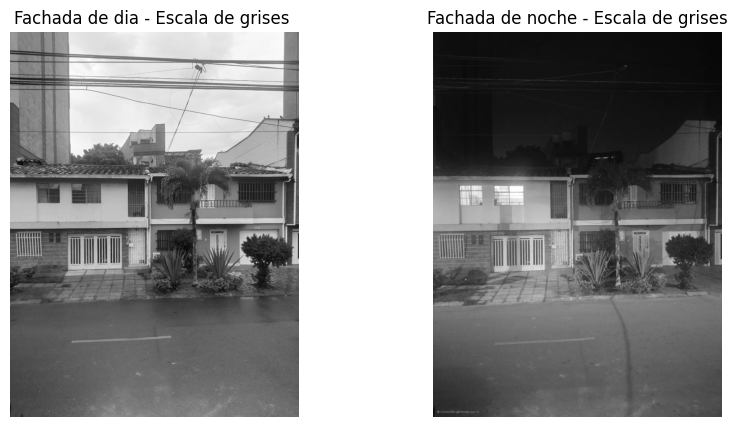

Imagenes con con contraste ajustado


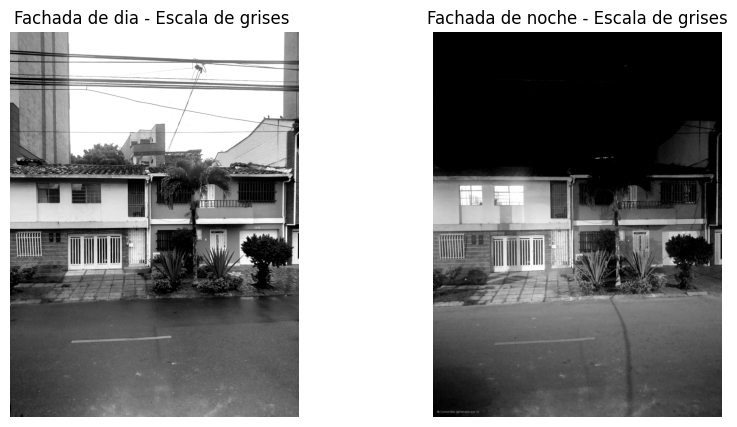

In [ ]:
# Aplicación del ajuste de contraste a las imágenes en escala de grises
fachada_dia_grises_contraste_ajustado = ajustar_contraste_imagen(fachada_dia_grises, 1.5)  # Día: contraste aumentado
fachada_noche_grises_contraste_ajustado = ajustar_contraste_imagen(fachada_noche_grises, 1.5)  # Noche: contraste aumentado
# Mostrar imágenes originales y con contraste ajustado
print("Imagenes originales en escala de grises")
mostrar_imagenes_grises(fachada_dia_grises, fachada_noche_grises, "Fachada de dia - Escala de grises ", "Fachada de noche - Escala de grises")
print("Imagenes con con contraste ajustado")
mostrar_imagenes_grises(fachada_dia_grises_contraste_ajustado, fachada_noche_grises_contraste_ajustado, "Fachada de dia - Escala de grises ", "Fachada de noche - Escala de grises")

#### Corrección gama

In [ ]:
# Función para aplicar corrección gamma a una imagen en escala de grises
def corregir_gama_imagen(imagen, gamma):
    # Convertir la imagen a tipo float y normalizar a [0, 1]
    imagen_float = imagen.astype('float32') 
    
    # Aplicar corrección gamma: potencia sobre la imagen normalizada
    imagen_ajustada = 255 * np.power((imagen_float/255), gamma)
    
    # Asegurar que los valores estén en el rango [0, 255]
    # Este paso se puede omitir dado que en el cálculo no se salen de rango, pero se mantiene por seguridad
    imagen_ajustada = saturar_imagen(imagen_ajustada)
    
    # Convertir de nuevo a uint8 (saturar_imagen ya devuelve uint8)
    return imagen_ajustada

Imagenes originales en escala de grises


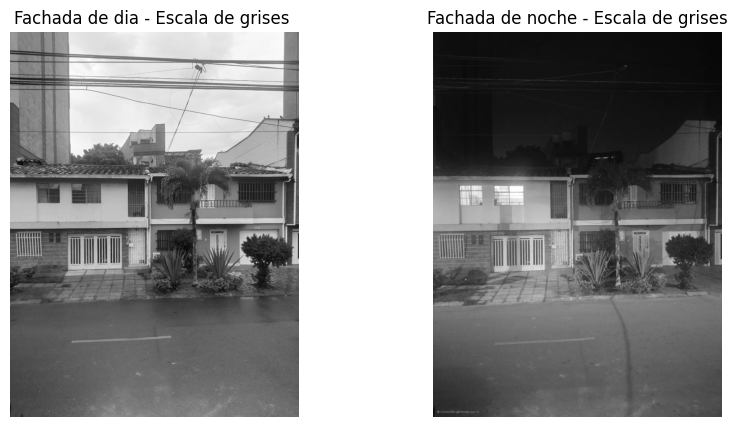

Imagenes con correccion gama (gamma <1 - aclara)


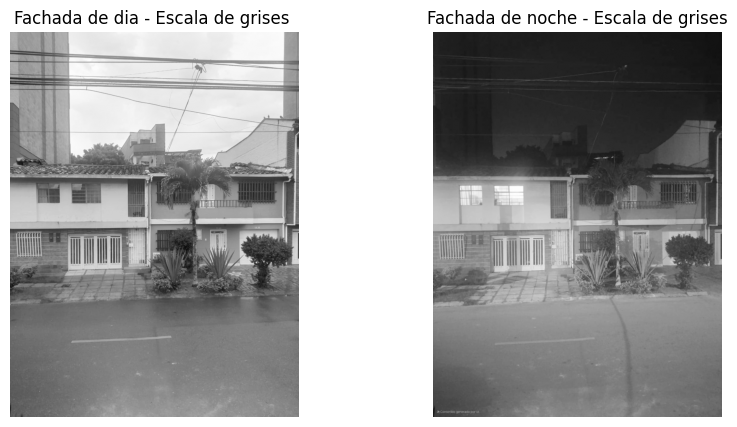

Imagenes con correccion gama (gamma >1 - oscurece)


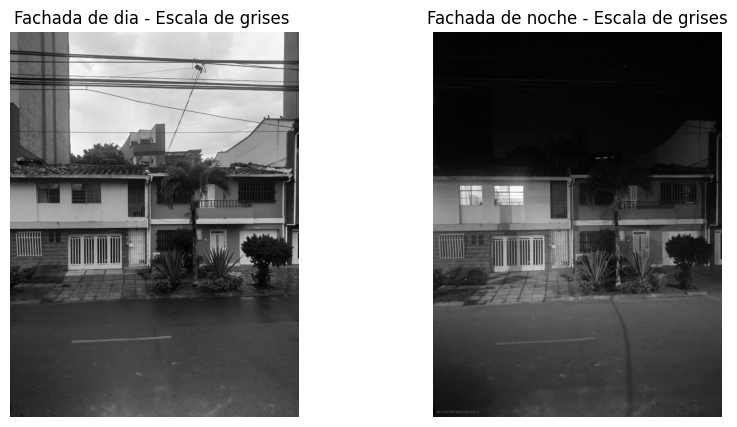

In [ ]:
# Aplicación de la corrección gamma a las imágenes en escala de grises
# Gamma < 1 aclara la imagen, gamma > 1 oscurece la imagen
fachada_dia_grises_gama_ajustada_aclara = corregir_gama_imagen(fachada_dia_grises, 0.7)  # Día: gamma aclara
fachada_noche_grises_gama_ajustada_aclara = corregir_gama_imagen(fachada_noche_grises, 0.7)  # Noche: gamma aclara
fachada_dia_grises_gama_ajustada_oscurece = corregir_gama_imagen(fachada_dia_grises, 1.5)  # Día: gamma oscurece
fachada_noche_grises_gama_ajustada_oscurece = corregir_gama_imagen(fachada_noche_grises, 1.5)  # Noche: gamma oscurece
# Mostrar imágenes originales y con corrección gamma aplicada
print("Imagenes originales en escala de grises")
mostrar_imagenes_grises(fachada_dia_grises, fachada_noche_grises, "Fachada de dia - Escala de grises ", "Fachada de noche - Escala de grises")
print("Imagenes con correccion gama (gamma <1 - aclara)")
mostrar_imagenes_grises(fachada_dia_grises_gama_ajustada_aclara, fachada_noche_grises_gama_ajustada_aclara, "Fachada de dia - Escala de grises ", "Fachada de noche - Escala de grises")
print("Imagenes con correccion gama (gamma >1 - oscurece)")
mostrar_imagenes_grises(fachada_dia_grises_gama_ajustada_oscurece, fachada_noche_grises_gama_ajustada_oscurece, "Fachada de dia - Escala de grises ", "Fachada de noche - Escala de grises")

#### Operaciones aritméticas entre imágenes

In [ ]:
# Funciones para realizar operaciones aritméticas entre imágenes en escala de grises
def suma_imagenes(imagen1, imagen2):
    # Convertir las imágenes a tipo int16 para evitar overflow
    imagen1_int = imagen1.astype('int16')
    imagen2_int = imagen2.astype('int16')
    
    # Sumar las imágenes píxel a píxel
    imagen_suma = imagen1_int + imagen2_int
    
    # Asegurar que los valores estén en el rango [0, 255]
    imagen_suma = saturar_imagen(imagen_suma)
    
    return imagen_suma

def resta_imagenes(imagen1, imagen2):
    # Convertir las imágenes a tipo int16 para evitar underflow
    imagen1_int = imagen1.astype('int16')
    imagen2_int = imagen2.astype('int16')
    
    # Restar las imágenes píxel a píxel
    imagen_resta = imagen1_int - imagen2_int
    
    # Asegurar que los valores estén en el rango [0, 255]
    imagen_resta = saturar_imagen(imagen_resta)
    
    return imagen_resta

def multiplicacion_imagenes(imagen1, imagen2):
    # Convertir las imágenes a tipo float32 para evitar overflow
    imagen1_float = imagen1.astype('float32')
    imagen2_float = imagen2.astype('float32')
    
    # Multiplicar las imágenes normalizando a [0,1] y reescalando a [0,255]
    imagen_multiplicacion = (imagen1_float / 255) * (imagen2_float / 255) * 255
    
    # Asegurar que los valores estén en el rango [0, 255]
    imagen_multiplicacion = saturar_imagen(imagen_multiplicacion)
    
    return imagen_multiplicacion

def division_imagenes(imagen1, imagen2):
    # Convertir las imágenes a tipo float32 para evitar overflow
    imagen1_float = imagen1.astype('float32')
    imagen2_float = imagen2.astype('float32')
    
    # Evitar división por cero reemplazando ceros por unos
    imagen2_float[imagen2_float == 0] = 1
    
    # Dividir las imágenes y reescalar a [0,255]
    imagen_division = (imagen1_float / imagen2_float) * 255
    
    # Asegurar que los valores estén en el rango [0, 255]
    imagen_division = saturar_imagen(imagen_division)
    
    return imagen_division

imagenes originales  en grises


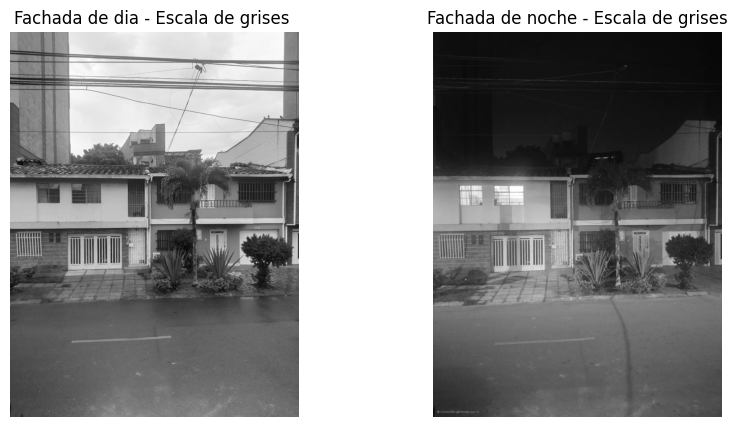

Resultado de las imagenes


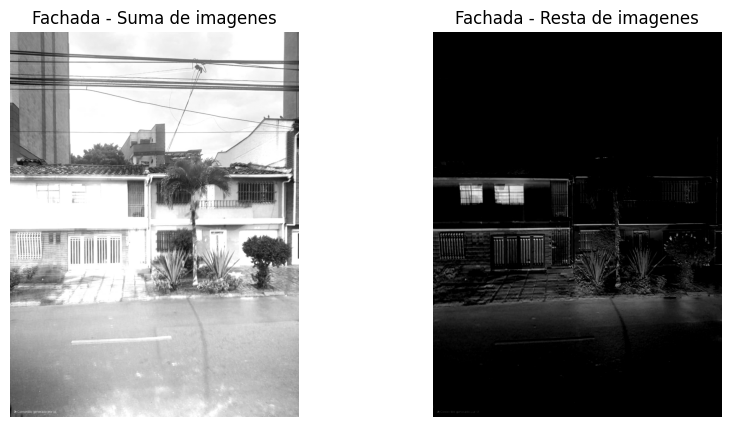

In [ ]:
# Suma y resta de imágenes en escala de grises
fachada_grises_suma = suma_imagenes(fachada_dia_grises, fachada_noche_grises)  # Suma píxel a píxel
fachada_grises_resta = resta_imagenes(fachada_noche_grises, fachada_dia_grises)  # Resta píxel a píxel
# Mostrar resultados de suma y resta
print("imagenes originales  en grises")
mostrar_imagenes_grises(fachada_dia_grises, fachada_noche_grises, "Fachada de dia - Escala de grises ", "Fachada de noche - Escala de grises")
print("Resultado de las imagenes")
mostrar_imagenes_grises(fachada_grises_suma, fachada_grises_resta, "Fachada - Suma de imagenes", "Fachada - Resta de imagenes")

imagenes originales  en grises


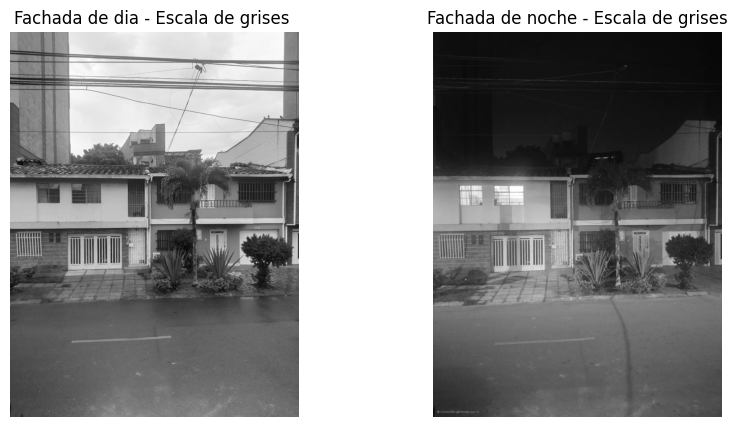

Resultado de las imagenes


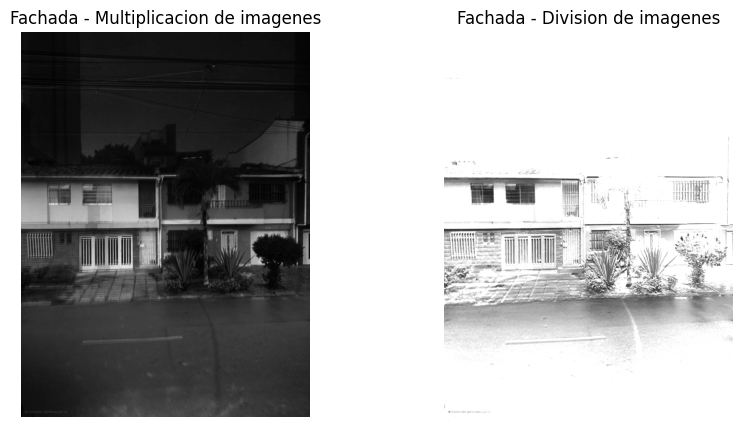

In [ ]:
# Multiplicación y división de imágenes en escala de grises
fachada_grises_multiplicacion = multiplicacion_imagenes(fachada_dia_grises, fachada_noche_grises)  # Multiplicación píxel a píxel
fachada_grises_division = division_imagenes(fachada_dia_grises, fachada_noche_grises)  # División píxel a píxel
# Mostrar resultados de multiplicación y división
print("imagenes originales  en grises")
mostrar_imagenes_grises(fachada_dia_grises, fachada_noche_grises, "Fachada de dia - Escala de grises ", "Fachada de noche - Escala de grises")
print("Resultado de las imagenes")
mostrar_imagenes_grises(fachada_grises_multiplicacion, fachada_grises_division, "Fachada - Multiplicacion de imagenes", "Fachada - Division de imagenes")

### RGB

Imagenes originales en RGB


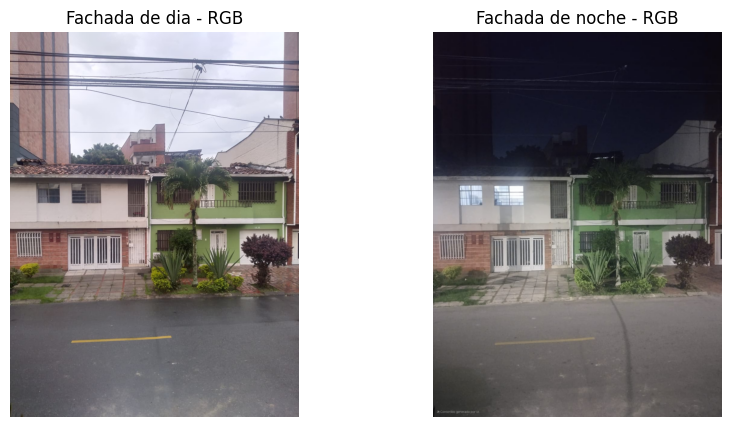

In [ ]:
# Visualización de las imágenes originales en RGB
print("Imagenes originales en RGB")
mostrar_imagenes_color(fachadaDia, fachadaNoche, "Fachada de dia - RGB", "Fachada de noche - RGB")

#### ajuste de brillo en RGB

In [ ]:
# Función para ajustar el brillo de una imagen RGB de manera independiente para cada canal
def ajuste_brillo_imagen_rgb(imagen, r, g, b):
    # Separar los canales RGB usando numpy (cada canal es una matriz 2D)
    canales = [imagen[..., i].copy() for i in range(3)]
    
    # Ajustar el brillo de cada canal (se respeta el mapeo original)
    canales[0] = ajustar_brillo_imagen(canales[0], r)  # Canal R
    canales[1] = ajustar_brillo_imagen(canales[1], g)  # Canal G
    canales[2] = ajustar_brillo_imagen(canales[2], b)  # Canal B
    
    # Combinar los canales ajustados de nuevo en una imagen RGB usando numpy
    imagen_ajustada = np.stack(canales, axis=2)
    
    return imagen_ajustada

Imagenes originales en RGB


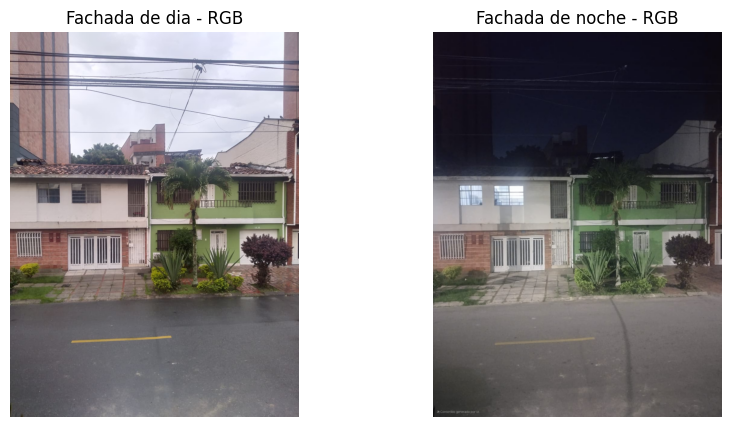

Imagenes con con brillo ajustado en RGB


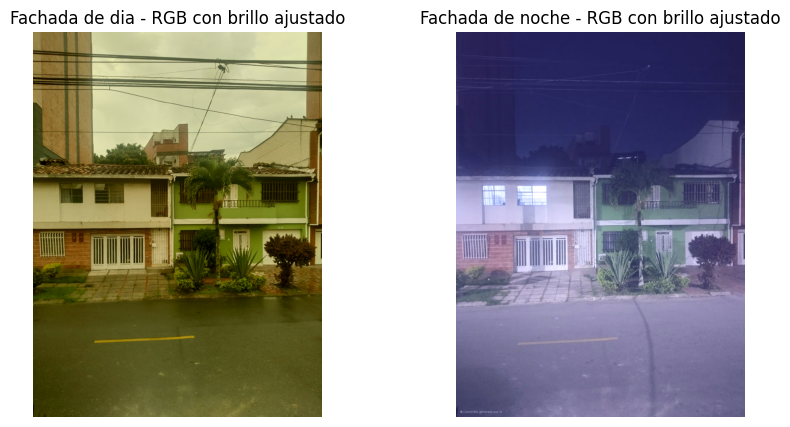

In [ ]:
# Aplicación del ajuste de brillo a las imágenes en RGB
fachada_dia_rgb_brillo_ajustado = ajuste_brillo_imagen_rgb(fachadaDia, -80, -20, -20)  # Día: brillo reducido en cada canal
fachada_noche_rgb_brillo_ajustado = ajuste_brillo_imagen_rgb(fachadaNoche, 60, 20, 20)  # Noche: brillo aumentado en cada canal
print("Imagenes originales en RGB")
mostrar_imagenes_color(fachadaDia, fachadaNoche, "Fachada de dia - RGB", "Fachada de noche - RGB")
print("Imagenes con con brillo ajustado en RGB")
mostrar_imagenes_color(fachada_dia_rgb_brillo_ajustado, fachada_noche_rgb_brillo_ajustado, "Fachada de dia - RGB con brillo ajustado", "Fachada de noche - RGB con brillo ajustado")

## 4. Entender y manipular la distribución de intensidades de una imagen.
Lleve a cabo la ecualización del histograma (usando la función de distribución acumulada) de las imágenes de la fachada del punto anterior. 
* ¿Qué diferencias hay entre los histogramas de la imagen tomada de día y la imagen tomada de noche? 
* ¿Cuáles son las transformaciones de ecualización en cada caso?

### Escala de grises

In [19]:
# Función para ecualizar el histograma de una imagen en escala de grises usando la función de distribución acumulada (CDF)
def equalizar_imagen_grises(imagen):
    """Equaliza el histograma de una imagen en escala de grises usando la CDF."""
    # Convertir la imagen a enteros en [0,255] en caso de que sea float (p.ej. resultado de np.dot)
    imagen_uint8 = np.clip(np.rint(imagen), 0, 255).astype('uint8')

    # Calcular el histograma sobre valores enteros
    hist, bins = np.histogram(imagen_uint8.flatten(), 256, [0,256])

    # Calcular la función de distribución acumulada (CDF)
    cdf = hist.cumsum()

    # Evitar problemas si la imagen es constante (cdf.max()==cdf.min())
    cdf_m = np.ma.masked_equal(cdf, 0)
    if cdf_m.max() == cdf_m.min():
        return imagen_uint8.copy()

    # Realizar la equalización del histograma (normalizar la CDF)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())

    # Rellenar los valores enmascarados con cero y convertir a uint8
    cdf_final = np.ma.filled(cdf_m, 0).astype('uint8')

    # Mapear los valores originales de la imagen (ya convertidos a uint8) a los nuevos valores equalizados
    imagen_equalizada = cdf_final[imagen.astype('uint8')]

    return imagen_equalizada

In [20]:
# Funciones para calcular y mostrar histogramas de imágenes en escala de grises, con y sin ecualización
def calcular_histogramas_grises(imagen1, imagen2):
    """Calcula los histogramas de dos imágenes, con y sin ecualización."""
    # Calcular histogramas sin ecualización
    hist1_sin_eq, bins1_sin_eq = np.histogram(imagen1.flatten(), bins=256, range=[0, 256])
    hist2_sin_eq, bins2_sin_eq = np.histogram(imagen2.flatten(), bins=256, range=[0, 256])

    # Calcular histogramas con ecualización
    imagen1_eq = equalizar_imagen_grises(imagen1)
    imagen2_eq = equalizar_imagen_grises(imagen2)
    hist1_con_eq, bins1_con_eq = np.histogram(imagen1_eq.flatten(), bins=256, range=[0, 256])
    hist2_con_eq, bins2_con_eq = np.histogram(imagen2_eq.flatten(), bins=256, range=[0, 256])

    datos_hist1 = (hist1_sin_eq, bins1_sin_eq, hist1_con_eq, bins1_con_eq)
    datos_hist2 = (hist2_sin_eq, bins2_sin_eq, hist2_con_eq, bins2_con_eq)
    
    return datos_hist1, datos_hist2

def mostrar_histogramas_grises(datos_hist1, datos_hist2, titulo1, titulo2):
    """Muestra cuatro histogramas: dos por imagen (original y ecualizado)."""
    hist1_sin_eq, bins1_sin_eq, hist1_con_eq, bins1_con_eq = datos_hist1
    hist2_sin_eq, bins2_sin_eq, hist2_con_eq, bins2_con_eq = datos_hist2

    plt.figure(figsize=(10, 10))

    # Histograma de la primera imagen (sin ecualización)
    plt.subplot(2, 2, 1)
    plt.plot(bins1_sin_eq[:-1], hist1_sin_eq, color='blue')
    plt.title(f'Histograma de {titulo1} (sin ecualización)')
    plt.xlabel('Intensidad de píxel')
    plt.ylabel('Frecuencia')
    plt.xlim([0, 255])
    plt.grid()

    # Histograma de la primera imagen (con ecualización)
    plt.subplot(2, 2, 2)
    plt.plot(bins1_con_eq[:-1], hist1_con_eq, color='green')
    plt.title(f'Histograma de {titulo1} (con equalización)')
    plt.xlabel('Intensidad de píxel')
    plt.ylabel('Frecuencia')
    plt.xlim([0, 255])
    plt.grid()

    # Histograma de la segunda imagen (sin ecualización)
    plt.subplot(2, 2, 3)
    plt.plot(bins2_sin_eq[:-1], hist2_sin_eq, color='blue')
    plt.title(f'Histograma de {titulo2} (sin equalización)')
    plt.xlabel('Intensidad de píxel')
    plt.ylabel('Frecuencia')
    plt.xlim([0, 255])
    plt.grid()

    # Histograma de la segunda imagen (con ecualización)
    plt.subplot(2, 2, 4)
    plt.plot(bins2_con_eq[:-1], hist2_con_eq, color='green')
    plt.title(f'Histograma de {titulo2} (con equalización)')
    plt.xlabel('Intensidad de píxel')
    plt.ylabel('Frecuencia')
    plt.xlim([0, 255])
    plt.grid()

    plt.tight_layout()
    plt.show()

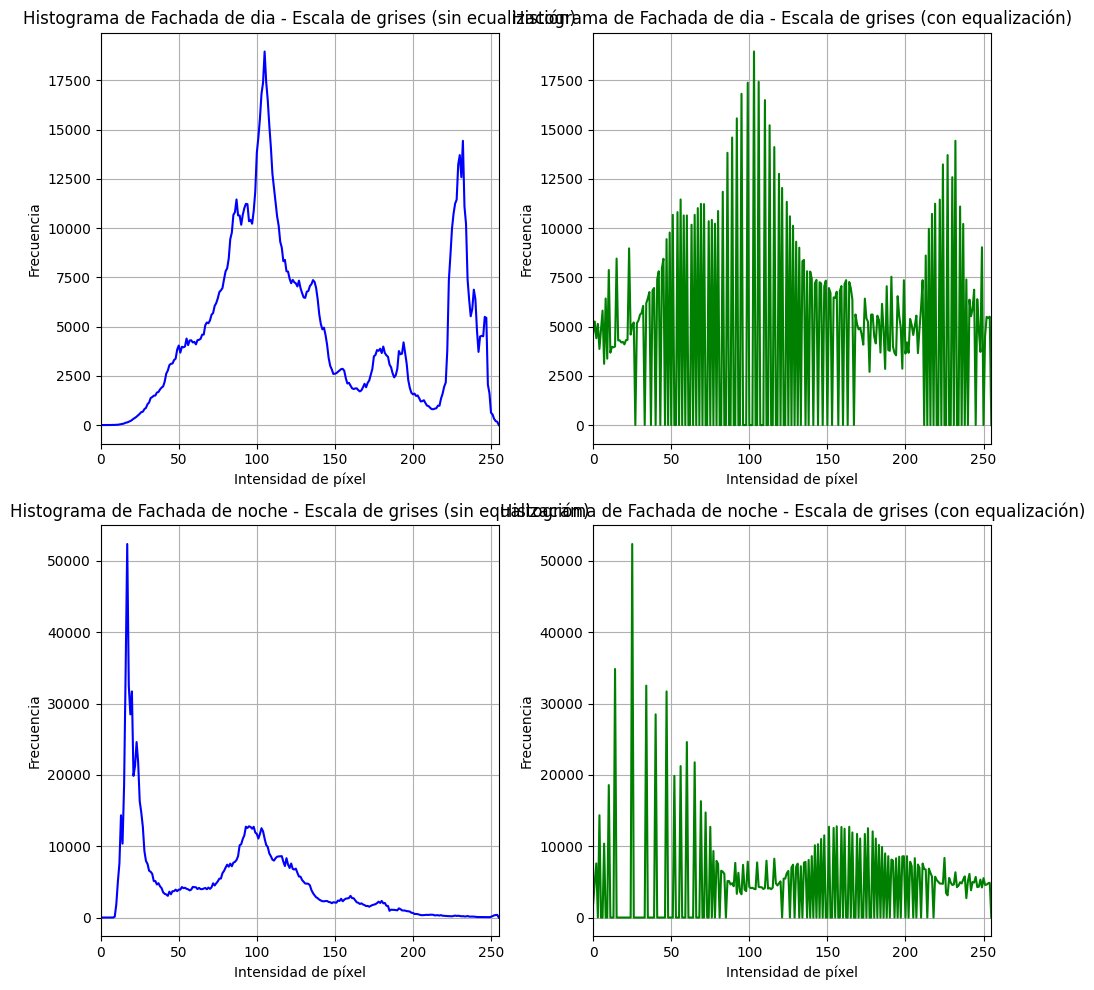

In [21]:
# Cálculo y visualización de los histogramas de las imágenes en escala de grises
# 1. Calcular los histogramas (original y ecualizado) para ambas imágenes
datos_hist_dia, datos_hist_noche = calcular_histogramas_grises(fachada_dia_grises, fachada_noche_grises)

# 2. Mostrar los histogramas obtenidos
mostrar_histogramas_grises(datos_hist_dia, datos_hist_noche, "Fachada de dia - Escala de grises", "Fachada de noche - Escala de grises")

#### analisis de resultados
texto


### RGB


In [22]:
# Función para ecualizar el histograma de una imagen en color usando el canal V de HSV
def equalizar_imagen_color_hsv(imagen_bgr):
    # Verificar que la imagen se haya cargado correctamente
    if imagen_bgr is None:
        # Si la imagen no se pudo cargar, devolvemos 'None'
        return None

    # 1. Convertir la imagen de BGR a HSV
    hsv = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2HSV)
    
    # 2. Separar los canales H, S, V
    h, s, v = cv2.split(hsv)
    
    # 3. Ecualizar SOLAMENTE el canal 'V' (Valor/Brillo)
    v_equalizado = cv2.equalizeHist(v)
    
    # 4. Volver a unir los canales
    hsv_equalizado = cv2.merge([h, s, v_equalizado])
    
    # 5. Convertir la imagen de vuelta de HSV a BGR
    imagen_final_bgr = cv2.cvtColor(hsv_equalizado, cv2.COLOR_HSV2BGR)
    
    return imagen_final_bgr

In [23]:
# Funciones para calcular y mostrar histogramas RGB de imágenes en color, con y sin ecualización
def calcular_histogramas_rgb(imagen_bgr1, imagen_bgr2):
    """Calcula los histogramas RGB de dos imágenes, con y sin ecualización."""
    # --- 1. Ecualizar ambas imágenes ---
    img1_eq = equalizar_imagen_color_hsv(imagen_bgr1)
    img2_eq = equalizar_imagen_color_hsv(imagen_bgr2)

    # --- 2. Función interna para calcular los 3 histogramas de una imagen ---
    def _calc_hist_rgb(imagen):
        if imagen is None:
            # Si la imagen no existe, devuelve None para cada histograma
            return None, None, None
        # Separa los canales y calcula el histograma para cada uno
        b, g, r = cv2.split(imagen)
        hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
        hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
        hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])
        return hist_b, hist_g, hist_r

    # --- 3. Calcular todos los histogramas ---
    # Para la imagen 1 (original y ecualizada)
    hists_bgr1_orig = _calc_hist_rgb(imagen_bgr1)
    hists_bgr1_eq = _calc_hist_rgb(img1_eq)
    
    # Para la imagen 2 (original y ecualizada)
    hists_bgr2_orig = _calc_hist_rgb(imagen_bgr2)
    hists_bgr2_eq = _calc_hist_rgb(img2_eq)

    # --- 4. Agrupar los datos para devolverlos ---
    # datos_hist1 = (hist_b_orig, hist_g_orig, hist_r_orig, hist_b_eq, hist_g_eq, hist_r_eq)
    datos_hist1 = hists_bgr1_orig + hists_bgr1_eq
    datos_hist2 = hists_bgr2_orig + hists_bgr2_eq
    
    return datos_hist1, datos_hist2

def mostrar_histogramas_rgb(datos_hist1, datos_hist2, titulo1, titulo2):
    """Muestra cuatro histogramas RGB a partir de los datos precalculados."""
    
    # --- 1. Desempaquetar los datos ---
    # Seis histogramas por cada imagen original
    hist_b1_orig, hist_g1_orig, hist_r1_orig, hist_b1_eq, hist_g1_eq, hist_r1_eq = datos_hist1
    hist_b2_orig, hist_g2_orig, hist_r2_orig, hist_b2_eq, hist_g2_eq, hist_r2_eq = datos_hist2

    # --- 2. Crear el grid 2x2 para los gráficos ---
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
    fig.suptitle("Comparación de Histogramas RGB (Original vs. Ecualizado)", fontsize=16)

    # --- 3. Función interna para dibujar un histograma RGB en un 'eje' (ax) ---
    def _plot_rgb_hist_on_axis(ax, hists_bgr, titulo_grafico):
        hist_b, hist_g, hist_r = hists_bgr
        
        # Comprobar si los datos del histograma son válidos
        if hist_b is None or hist_g is None or hist_r is None:
            ax.set_title(f"{titulo_grafico}\n(Error: Datos no calculados)")
            return
        
        # Dibujar los 3 histogramas en el eje (ax)
        ax.plot(hist_b, color='blue', label='B')
        ax.plot(hist_g, color='green', label='G')
        ax.plot(hist_r, color='red', label='R')
        
        # Configurar el gráfico
        ax.set_title(titulo_grafico)
        ax.set_xlabel('Intensidad (0-255)')
        ax.set_ylabel('Frecuencia')
        ax.set_xlim([0, 256])
        ax.legend(loc='upper right')
        ax.grid(True, linestyle='--', alpha=0.6)

    # --- 4. Dibujar los 4 gráficos en sus posiciones ---
    _plot_rgb_hist_on_axis(ax1, (hist_b1_orig, hist_g1_orig, hist_r1_orig), f'Histograma de {titulo1} (Original)')
    _plot_rgb_hist_on_axis(ax2, (hist_b1_eq, hist_g1_eq, hist_r1_eq), f'Histograma de {titulo1} (Ecualizada)')
    _plot_rgb_hist_on_axis(ax3, (hist_b2_orig, hist_g2_orig, hist_r2_orig), f'Histograma de {titulo2} (Original)')
    _plot_rgb_hist_on_axis(ax4, (hist_b2_eq, hist_g2_eq, hist_r2_eq), f'Histograma de {titulo2} (Ecualizada)')
    
    # --- 5. Mostrar el resultado ---
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

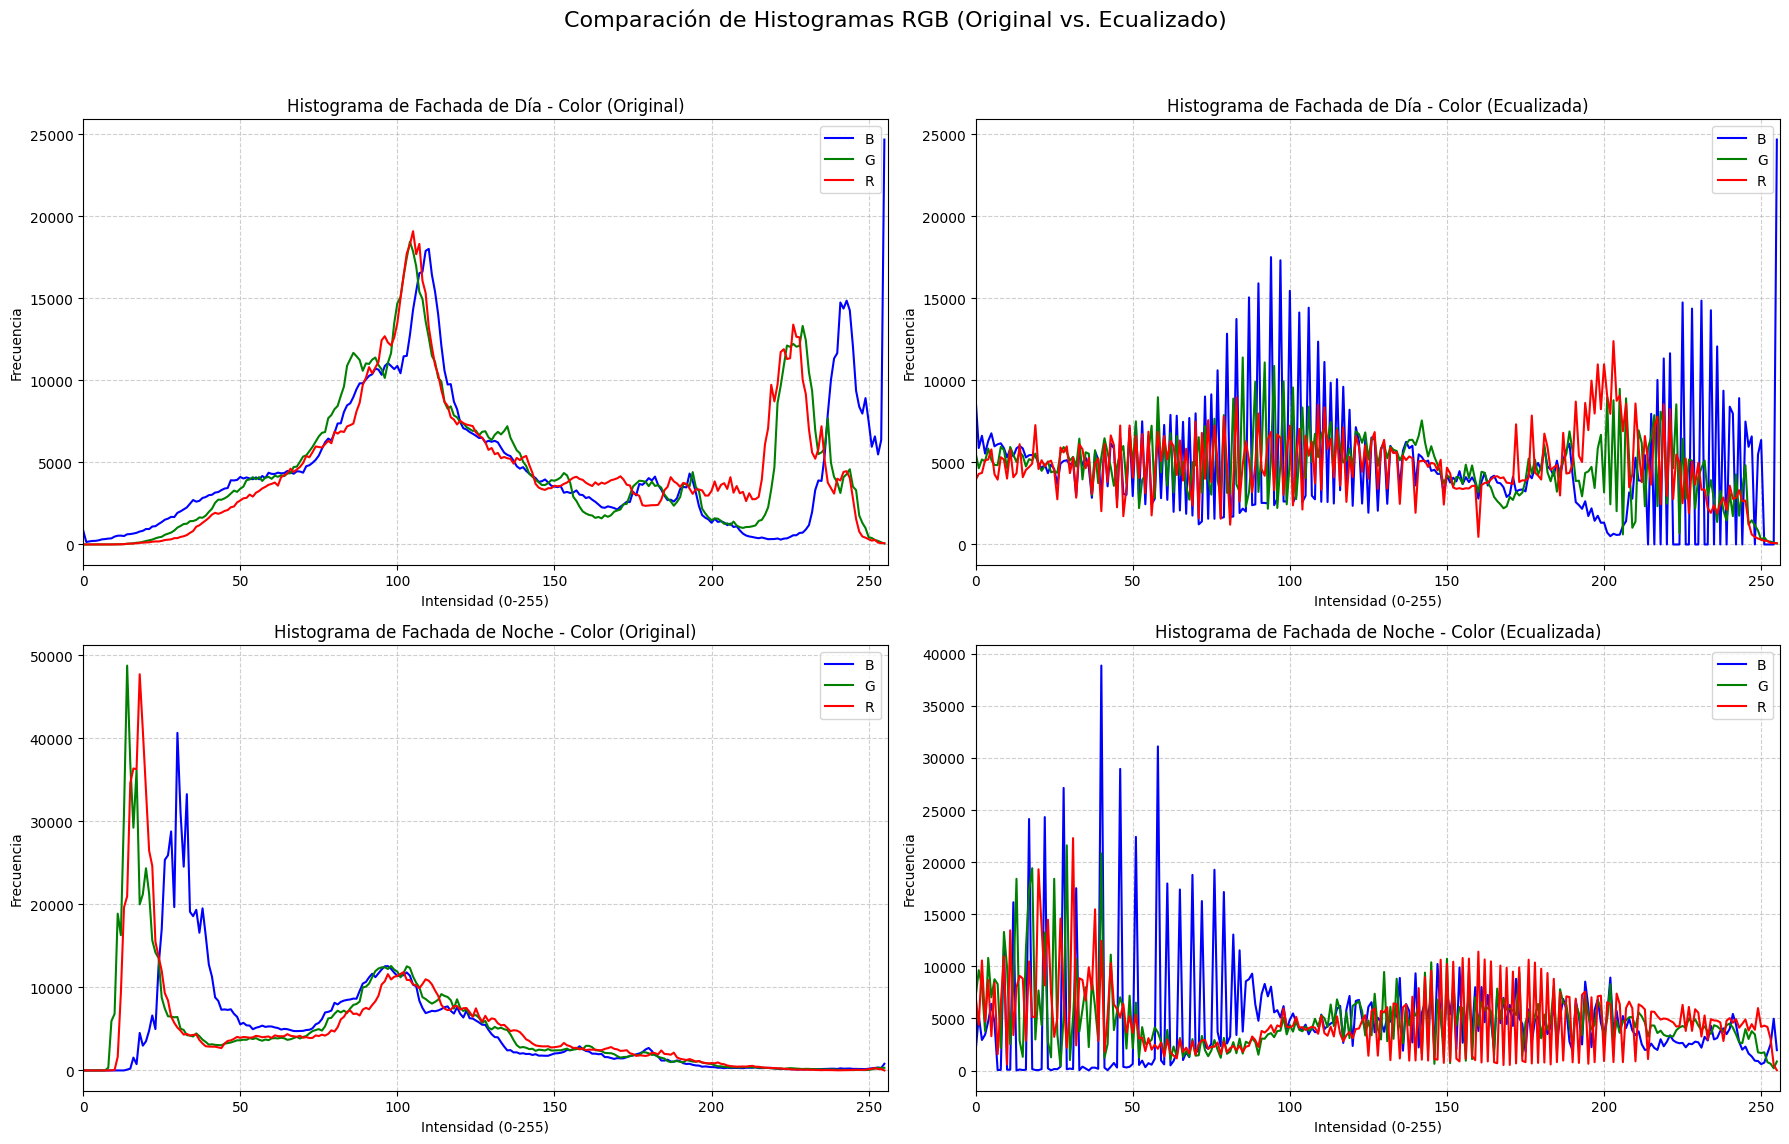

In [24]:
# Cálculo y visualización de los histogramas RGB para ambas imágenes (día y noche)
# 1. Calcular los histogramas RGB (original y ecualizado) para ambas imágenes
datos_hist_dia_rgb, datos_hist_noche_rgb = calcular_histogramas_rgb(fachadaDia, fachadaNoche)

# 2. Mostrar los histogramas calculados
mostrar_histogramas_rgb(datos_hist_dia_rgb, datos_hist_noche_rgb, "Fachada de Día - Color", "Fachada de Noche - Color")

#### Analisis
texto